# [XRHETOR-R1A] Module 3: The Rhetoric of Data
---
<img src="https://pixel.nymag.com/imgs/daily/science/2014/10/16/16-trustingraphsnew.nocrop.w536.h2147483647.2x.gif" style="width: 400px; height: 400px;" />

### Professor Amy Tick

This module explores how data science can persuade or mislead through intentional or unintentional decisions at every step of the data science process. First, we'll how human judgment still plays a part in seemingly unbiased, 'automated' programming processes by picking apart how Module 2's Wordnet dictionary was compiled. Then, we'll discover how some common cognitive biases are exploited in charts and graphs to emphasize a particular mesage.

*Estimated Time: 50 minutes*

---

### Topics Covered
- Cognitive biases
- Natural Language Processing
- Text Analysis
- Data Visualization
- Data Communication

### Table of Contents

[Introduction](#section 0)<br>

1 - [Deceitful Data: Three Ways to Make a Dictionary](#section 1)<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; i - [By Hand](#subsection 1)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ii - [By Computer](#subsection 2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; iii - [Both](#subsection 3)


2 - [Ambiguous Analysis](#section 2)<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; i - [Simple Word Counts](#subsection 4)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ii - [Advanced Text Analysis](#subsection 5)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; iii - [Statistical Significance](#subsection 6)

3 - [Grifting Graphs](#section 3)<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; i - [Types of Graphs](#subsection 7)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ii - [Color](#subsection 8)

4 - [What's Next?](#section 4)<br>




**Dependencies:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import wordnet as wn
import json
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy as sp
!pip install plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


---
## Introduction <a id='section 0'></a>

>  *“No study is less alluring or more dry and tedious than statistics, unless the mind and imagination are set to work.” - William Playfair, inventor of the line graph, bar graph, and pie chart. *

As data science becomes more and more in-demand, it has emerged as a powerful rhetorical tool. Major news sources pair their stories with 'infographics,' while [studies]('http://journals.sagepub.com/doi/abs/10.1177/0963662514549688') [show]('http://lsr.nellco.org/cgi/viewcontent.cgi?article=1476&context=nyu_plltwp') that the average person finds data and data visualizations highly persuasive. After all, 'numbers don't lie'. Or do they?

Let's return to the data analysis we did in module 2 and see, at each step of the process, the many opportunities to make our numbers 'lie.' As a refresher, here's a map of the data science process we used.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Data_visualization_process_v1.png" style="width: 550px; height: 400px;" />

---
## 1. Deceitful Data: Three Ways to Make a Dictionary <a id='section 1'></a>

Data science starts with a data set upon which all subsequent analysis is built. If that data is skewed, incomplete, or just plain wrong, it's impossible to draw accurate conclusions from it.

In module 02, we relied on the set of Moral Foundations words and their synonyms, collected in a Python dictionary, to answer questions about candidate and party values. Let's look further into the ways such data sets are constructed and how they can lead you horribly astray.

### i. Method 1: Do it by hand*<a id='subsection 1'></a>
\**or by your grad students' hands*

The original MFT word count analysis was done on religious sermon texts by Graham, Haidt, and Nosek as detailed in [this paper](http://projectimplicit.net/nosek/papers/GHN2009.pdf). Their methodology for constructing their dictionary is below:

> Dictionary development had an expansive phase and a contractive phase, all occurring before reading the sermons. In the expansive phase Jesse Graham and five research assistants generated as many associations, synonyms, and antonyms for the base foundation words as possible, using thesauruses and conversations with colleagues. This included full words and word stems (for instance, nation  covers national, nationalistic, etc.)...In the contractive phase, Jesse Graham and Jonathan Haidt deleted words that seemed too distantly related to the five foun- dations and also words whose primary meanings were not moral (e.g., just more often means only than fair).

The file `haidt_dict.json` contains the relevant portions of the dictionary Graham, Haidt, and Nosek used in their paper. Run the cell below to load the dictionary into the variable `haidt_dict`.

In [2]:
# Run this cell to load the dictionary into a variable
with open('../mft_data/haidt_dict.json') as json_data:
    haidt_dict = json.load(json_data)


Compiling a dictionary this way is extremely time-consuming. Moreover, it involves many, many judgments from researchers, who like all humans are biased. **Selection bias** in data processing leads to a data set that may not be representative of the population to be analyzed. In this case, it could result in a dictionary that includes or omits certain words and leads to skewed word count results. 

Selection bias can be caused by cognitive biases like **confirmation bias**, where people are predisposed to look for data that they think will confirm their preconceptions.

What are some ways selection bias could have happened while making this dictionary? How did Graham, Haidt, and Nosek try to avoid biasing their data?

---
## 2. Ambiguous Analysis <a id='section 2'></a>

After the data is collected and processed, the next step is to do exploratory analysis, then model and estimate. Here, we'll evaluate the approach we used in Module 02 as well as some more advanced text-analysis methods.

### i. Simple word counts <a id='subsection 4'></a>


The word count metric is appealing: it's straightforward to code, fast to calculate, and easy to visualize. However, it relies heavily on the dictionary it uses, making it very susceptible to selection bias.

The cell below compares the averages for the speech data, calculated once using the WordNet dictionary from Module 02, and recalculated using the dictionary from the Graham, Haidt, Nosek study. How large is the difference between the two sets of averages?

Text(0.5,1,'Haidt Dictionary')

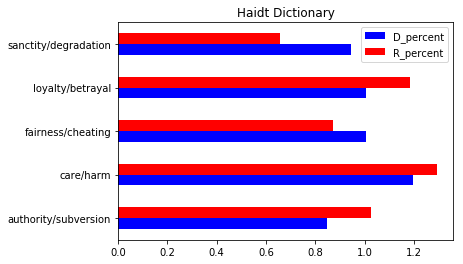

In [3]:
# read in the table of averages
foundation_avg = pd.read_csv('party_avgs.csv', index_col = 0)
haidt_foundation_avg = pd.read_csv('haidt_party_avgs.csv', index_col = 0)

# plot the averages


haidt_foundation_avg.plot.barh(color=['b', 'r'])
plt.title('Haidt Dictionary')


Another issue with this approach is **word ambiguity**. One of our entries for 'care' is 'charg', as in "the babysitter is in charge of taking care of the baby." But, Python returns matches for these uses of the word in speeches:

* [20]"*...a unique advisory group charged with thinking of new ideas...*" Yes!
* [86]"*...so much in line with what often we are charged with...*" Yes!
* [169]"*...it is even worse that you re being charged interest rates..*" No?
* [39]"*...imagine if you could charge your car in your garage at night...*" Definitely no.

Clearly, Python's string-matching function is not sophisticated enough to pick out only the word senses we intend. 

Some more sophisticated algorithms can try to infer ambigous word meaning from a word's context ([Madly Ambiguous](http://madlyambiguous.osu.edu:1035/) uses Wordnet for this very purpose!). However, even they are far from 100% accurate. The field of **Natural Language Processing** has been progressing by leaps and bounds to improve computers' ability to process language in the way that humans do naturally.

### ii. Advanced Text Analysis <a id='subsection 5'></a>

Given how biased we know human brains to be, it's tempting to remove the human element from analysis as much as possible. The **Bag of Words** method is one way to analyze texts by their word counts, *without* making decisions about which words are of interest.

*Note: the code in this section uses Python libraries and linear algebra techniques not covered in these modules. You are not expected to write code like this- we are walking you through it so you can see the kinds of things you can do further down the road in data science.*

The first step is to combine all the speeches into one big 'word bag', then find the unique set of words across all speeches. Then, a table is made with one column for every unique word in the speeches and one row for every speech (a 'word vector'). 

In [4]:
# All code in this subsection adapted from Deborah Nolan and Joey Gonzalez, DATA-100 Lecture 08. 
# http://www.ds100.org/fa17/assets/notebooks/08-lec/regular_expression_examples.html

# Create a copy of our speech data
speech = pd.read_csv('speeches.csv', index_col=0)

# create the word vectors
vec = TfidfVectorizer()
tfidf = vec.fit_transform(speech['clean_speech'])

tfidf.get_shape()

(430, 22316)

The last line gives the shape of the table: that's a lot of columns, or put another way, that's a very high-dimensional table! It's hard for us to visualize 22316th-dimensional space, but we're good at visualizing 2-dimensional space. So, our next step is to reduce the dimensions of this table, keeping only the most informative dimensions. The code does this by treating the frequency of each individual word as a feature of a speech and finding the feature vectors that vary the most.

In [5]:
np.random.seed(42)

# Finds the 2 largest singular values/vectors for the table
(u, s, vt) = sp.sparse.linalg.svds(tfidf, k=2)

speech['x'] = u[:,0]
speech['y'] = u[:,1]

# Plot the graph
colors = np.array(["rgba({0},{1},{2},1)".format(*c) for c in sns.color_palette("RdBu_r", len(speech))])
colors[-1] = "rgba(.99,.5,.2,1.)"
py.iplot([go.Scatter(x = speech['x'], y = speech['y'], mode='markers', marker=dict(color=colors), 
                     text=speech['Candidate'])])


This graph can show underlying patterns to the speech data that may not be visible to the human eye. But, it suffers from two immediate problems:

* Difficult to interpret
* Doesn't solve word ambiguity issue

No perfect solution exists for unbiased text analysis. But, it is still possible to gain powerful, well-supported insights from data by using the right tools for the analysis task at hand.

### iii. Statistical Significance <a id='subsection 6'></a>

Even if text analyis shows a difference between two groups (such as Democrat and Republican speech), that difference may not be significant. **Statistical significance** is determined by testing hypotheses about how the observed difference came about.

There are two hypotheses:

1. The **null hypothesis**- Democrats and Republicans use Moral Foundation words at the same rates. Any difference in observed word usage is due to random chance.
2. The **alternate hypothesis**- The difference in how Democrats and Republicans use words is not due to chance.

By using statistical methods, it's possible to calculate the **p-value**: the chance that we'd see a word usage difference as large or larger than the one we saw in the data, if the null hypothesis were true. For example, a p-value of $0.10$ means there's a ten percent chance that the Democrat-Republican difference we saw would happen if all candidates used words at the same rates. By convention, a p-value of 0.05 is **statistically significant** and a p-value of 0.01 is **highly statistically significant**.

But, significance can be manufactured using **p-hacking**: manipulating test data without a hypothesis to find patterns, then presenting those patterns as significant.

Go to the [FiveThirtyEight Interactive](https://projects.fivethirtyeight.com/p-hacking/) to do some p-hacking of your own.

---
## 3. Grifting Graphs <a id='section 3'></a>

Once analysis is complete, a proud data scientist will want to communicate their results. A good visualization can draw attention to a pattern, summarize a finding, or support an argument. This section will cover guidelines for displaying data faithfully and convincingly.

To show how the same data can be represented many different ways, we'll use the speech data from Module 02- specifically, the average Moral Foundation percents we calculated. Run the cell below to load the data.


In [6]:
# read the speech data into a pandas table
foundation_avg = pd.read_csv('party_avgs.csv', index_col=0).transpose()
foundation_avg

,authority/subversion,care/harm,fairness/cheating,liberty/oppression,loyalty/betrayal,sanctity/degradation
D_percent,0.321495,0.292418,0.082472,0.030215,0.145686,0.204513
R_percent,0.393636,0.176955,0.066454,0.039025,0.080041,0.191499


### i. Types of Graphs <a id='subsection 7'></a>

Different types of plots are great for emphasizing different things. Pandas makes plotting easy: for a DataFrame with numerical data like `foundation_avg`, you can create a plot by calling `.plot` followed by the specific plotting method. For example, in Module 02 we relied heavily on bar graphs using `.bar()`:

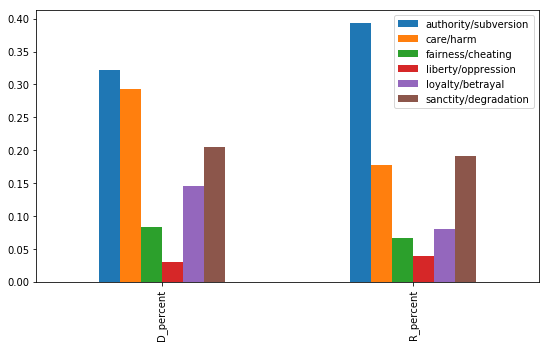

In [7]:
# Create a bar plot of foundation averages. 
# Note: the figsize argument is optional, but can make the plot bigger and easier to read
foundation_avg.plot.bar(figsize=(9,5))

Bar plots are great for this purpose because they make it very easy to compare numerical variables to one another. In this case, we can easily compare the average percentages of each foundation for each party.

But, not all bar plots are created equal. Here, it's easy to compare percentages within a party, but harder to compare percentages across parties because Democratic and Republican averages are so far apart. 

We can emphasize the differences between parties for each foundation by **transposing** `foundation_avg` (i.e. making the columns into rows and the rows into columns) and making a bar chart of that. Create a variable `party_avg` by calling `.transpose()` on `foundtion_avg`.

In [8]:
# Your code here
party_avg = foundation_avg.transpose()
party_avg

,D_percent,R_percent
authority/subversion,0.321495,0.393636
care/harm,0.292418,0.176955
fairness/cheating,0.082472,0.066454
liberty/oppression,0.030215,0.039025
loyalty/betrayal,0.145686,0.080041
sanctity/degradation,0.204513,0.191499


Now create another bar chart for `party_avg`, which has the same data as the `foundation_avg` bar plot but different bar groupings. When would you want to use this plot instead of the first one?

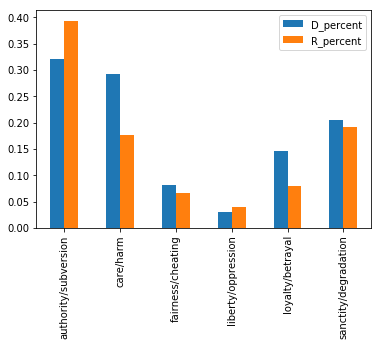

In [9]:
# Your code here
party_avg.plot.bar()

An alternative to the bar plot is the **stacked bar plot**, which stacks all of the bars for each party on top of each other. Create a stacked bar plot for `foundation_avg` below by creating a bar plot, then adding the argument `stacked=True`.

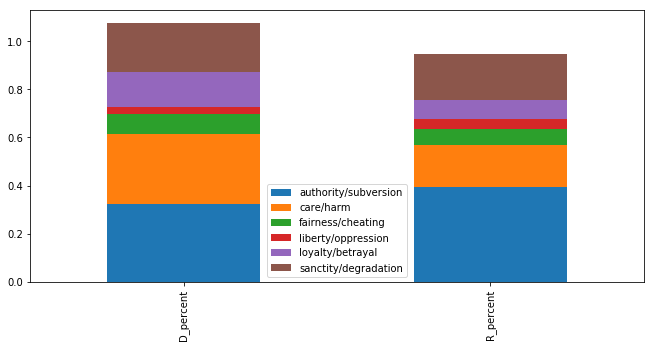

In [10]:
# Create a stacked bar plot of foundation averages. 
# Hint: this should look like the code for a bar graph, but with one extra argument for bar()
foundation_avg.plot.bar(stacked=True, figsize=(11,5))

Stacked plots combine a lot of info into fewer bars, which can be visually appealing. But, they can cause comparison errors because they **jiggle the baseline**: for every stacked bar except the base bar, the baseline begins at a different height, making it hard to compare lengths.

Here's an extreme example of jiggling (with a few other bonus graph sins: which ones can you find?):

<img src="https://i.kinja-img.com/gawker-media/image/upload/s--DstspxbR--/c_fit,fl_progressive,q_80,w_636/b5icpqdsnzsdaezvnrm1.jpg" width="500" height="500" />

Another way we might represent our percentages is with a **pie plot**, where each variable value is represented by a 'slice' of a circle. Create a pie chart using `.pie()` for the `party_avg_pie` table. Note: since there are 2 parties, pandas needs to be told to make one pie plot for each party by including the argument `subplot=True`. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11bc834a8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11c6cb5c0>], dtype=object)

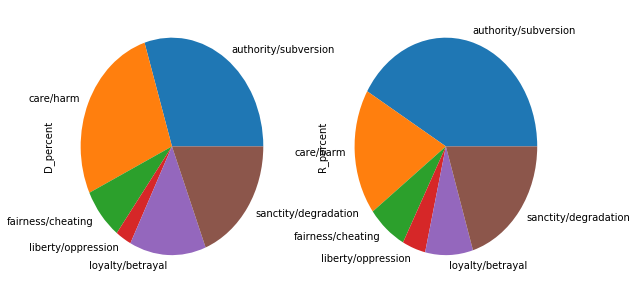

In [11]:
# Use this table to make a pie chart. 
# Values are multiplied to be larger so pandas plots it more easily (the proportions are the same)
party_avg_pie = party_avg * 1000

# Create a pie chart using .pie()
# Hint: don't forget to set subplot=True!
# Optional: set legend=False and figsize=(9,5) to get a cleaner graph
party_avg_pie.plot.pie(subplots=True, legend=False, figsize=(9,5))

Pie charts are visually appealing, but they can be problematic for readers. Consider these two bars:

<img src='len_compare.png' width=600 height=200>

It's quick and easy to see that the top one is twice as long as the bottom. (That's why we like bar plots so much)

Now, consider this image. How much smaller is the second pizza compared to the first?

<img src='area_compare.png' width=500 height=150>

The first one has about twice the area of the second, but it's much harder to form a confident and accurate judgment.

This has major implications for pie charts and other area-based visualizations. While representing numbers with area seems intuitive, adding the extra dimension makes it harder for people to form accurate comparisons.

### ii. Distorting Data<a id='subsection 8'>

In the charts above, data was presented more clearly. However, it's easy to display data in more misleading formats. How is the data below misrepresented?

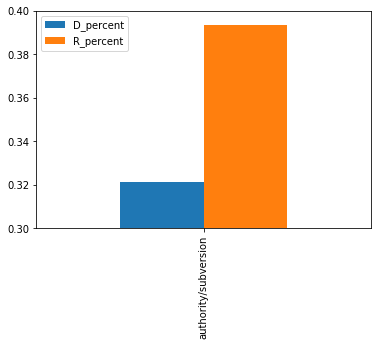

In [12]:
party_avg.take([0]).plot.bar(ylim = (.3,.4))

Data visualization can often be misleading! Let's look at some ways data can be represented in ambiguous or decepetive forms.



In the next example, the issue isn't in the content, but in the implications:

<img src='MisleadingImg2.gif' width=600 height=200>
What does this graph not take into account?

Pie charts can distort perception of proportions:
<img src='Misleading_Pie_Chart.png' width=600 height=200>

This chart and the following represent the same data. How does the first incorrectly interpret the data?
<img src='Misleading_Pie_Chart2.png' width=600 height=200>


### ii. Color <a id='subsection 8'></a>

The human visual cortex processes color preattentively; that is, people notice colors without trying to. Therefore, color can be a powerful tool to communicate information, and its use in data visualization has been the focus of many [studies](https://conference.scipy.org/scipy2014/schedule/presentation/1741/).

Pandas allows users to change their plot colors by including the `color=` argument. `color` can be set to equal a single color or a list of colors- one for each type of bar in the legend.

Try changing the colors for a bar plot of `party_avg`. You'll need a list of two colors, one for Democrats and one for Republicans in that order. Here are some of the colors pandas recognizes:

| Color   | code |
|---------|------|
| blue    | 'b'  |
| red     | 'r'  |
| green   | 'g'  |
| magenta | 'm'  |
| yellow  | 'y'  |
| cyan    | 'c'  |
| black   | 'k'  |

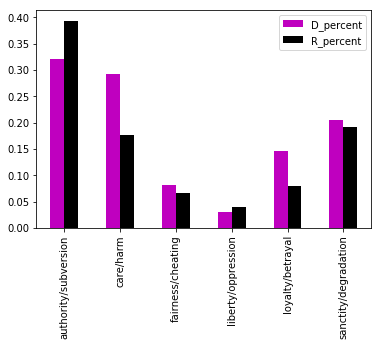

In [13]:
# Create a bar graph with non-default colors with the color= argument
party_avg.plot.bar(color=['m', 'k'])

Pandas plot functions can also take an argument called `colormap=` that colors graphs from a premade pallete. 

Try creating a bar plot for `foundation_avg` where `colormap` is set to equal `Pastel2`. You can also try out any of the other colormaps listed [here](https://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps).

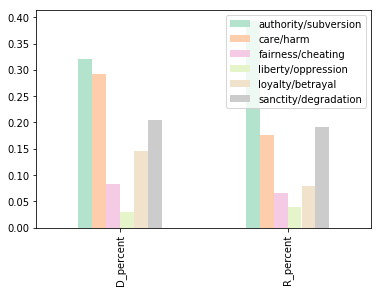

In [14]:
# Create a bar plot for foundation_avg where bar() has the argument colormap='Pastel2'
foundation_avg.plot.bar(colormap='Pastel2')

Colors help to create contrast and facilitate comparison. If colors are too similar to one another, two separate bars start to look like one individual blob and it's hard to compare the values. Set the colormap for `foundation_avg`'s bar plot equal to 'spring' to see an example.

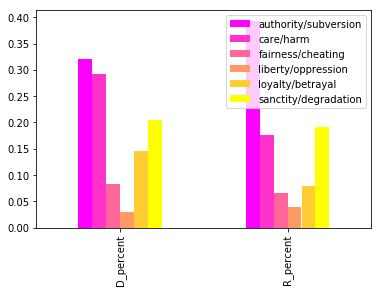

In [15]:
# Create a bar plot for foundation_avg with the 'spring' colormap
foundation_avg.plot.bar(colormap='spring')

Additionally, colors can communicate information about the importance of data. Lighter colors usually make areas look larger than darker colors. Furthermore, darker colors stand out more against the white background of most presentation platforms (paper, slideshows, Jupyter notebooks) and tend to look more prominent, weighty, and important.

Using a colormap that ranges from light to dark, then, can imply that your data varies along a scale, and the data at the dark end is more important. 

Try setting the colormap for a `foundation_avg` bar plot to `'Blues'`. How does that change our perception of the information? Is it appropriate for this graph, and if not, can you think of a graph where it would be appropriate?

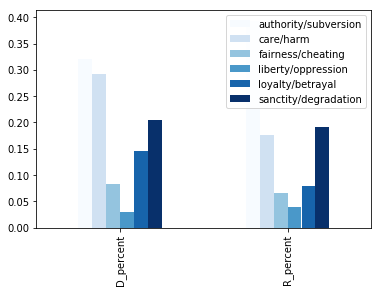

In [16]:
# Create a bar plot for foundation_avg with the 'Blues' colormap
foundation_avg.plot.bar(colormap='Blues')

Changing a plot's color palatte can also improve understanding by matching a **mental model**. For instance, Democrats are associated with the color blue while Republicans are associated with red. If a plot violates these associations...

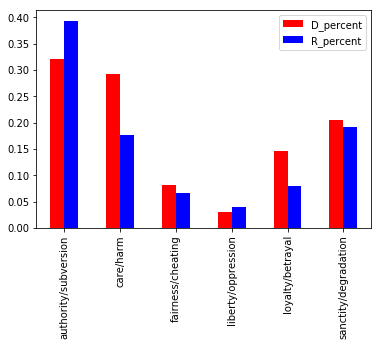

In [17]:
# Run the following cell to make a very misleading plot
party_avg.plot.bar(color=['r', 'b'])

...a reader could very easily read the results as exactly opposite what they are.


---
## 4. What's Next? <a id='section 4'></a>

Please help us understand your views of this module with this short survey: https://docs.google.com/forms/d/1n5xb7YkesWmCS6X8xnTGQiCFjiU4nr4fnzNQHwm8Oz4/edit?usp=sharing 

Data science is a fast-growing field with applications in almost every subject you can imagine. Students and researchers alike have used Jupyter notebooks and data-driven methods to do everything from completing a lower-division class problem set to presenting a graduate research project. 

If you'd like to learn more about how to incorporate data science into your academic career:

* [DATA-8](http://data8.org) is offered every semester and is a great introduction to coding and statistics. The website includes links to the textbook, syllibi, and past homeworks.
* Data Science [Connector Courses](https://data.berkeley.edu/education/connectors) teach applied data science in everything from literature to cancer research. They can be taken with or after DATA-8.
* The Berkeley Institute for Data Science ([BIDS](https://bids.berkeley.edu/)) hosts data science talks, research resources organized by field, and office hours for those interested in more in-depth data science research.
* [DLAB](http://dlab.berkeley.edu/) also offers workshops and consulting to help you hone your skills.


---

## Bibliography

- Playfair, W. (1801). The Statistical Breviary: Shewing, on a Principle Entirely New, the Resources of Every State and Kingdom in Europe; Illustrated with Stained Copper-plate Charts the Physical Powers of Each Distinct Nation with Ease and Perspicuity: to which is Added, a Similar Exhibition of the Ruling Powers of Hindoostan. T. Bensley, Bolt Court, Fleet Street.

---
Current notebook developed by: Alec Kan, Shalini Kunapuli, William McEachen

Previous notebook developed by: Keeley Takimoto, Sean Seungwoo Son, Sujude Dalieh

Data Science Modules: http://data.berkeley.edu/education/modules
